Demo script to analyze experiments results

,Dataset,Experiment,Train Accuracy,Validation Accuracy,Test Accuracy
0,cll,ex1_raw,0.963911,0.883333,0.735354
1,cll,ex2_nmf,0.655997,0.583333,0.531785
2,cll,ex2_svd,0.353571,0.383333,0.380000
3,cll,ex3_raw,0.587674,0.733333,0.616027
4,cll,wpfs_nmf,0.984698,0.900000,0.754747
5,cll,wpfs_svd,0.992008,0.900000,0.792323
6,lung,ex1_raw,0.975474,0.986364,0.960384
7,lung,ex2_nmf,0.591875,0.447727,0.605357
8,lung,ex2_svd,0.297952,0.250000,0.300000
9,lung,ex3_raw,0.433120,0.347727,0.473214


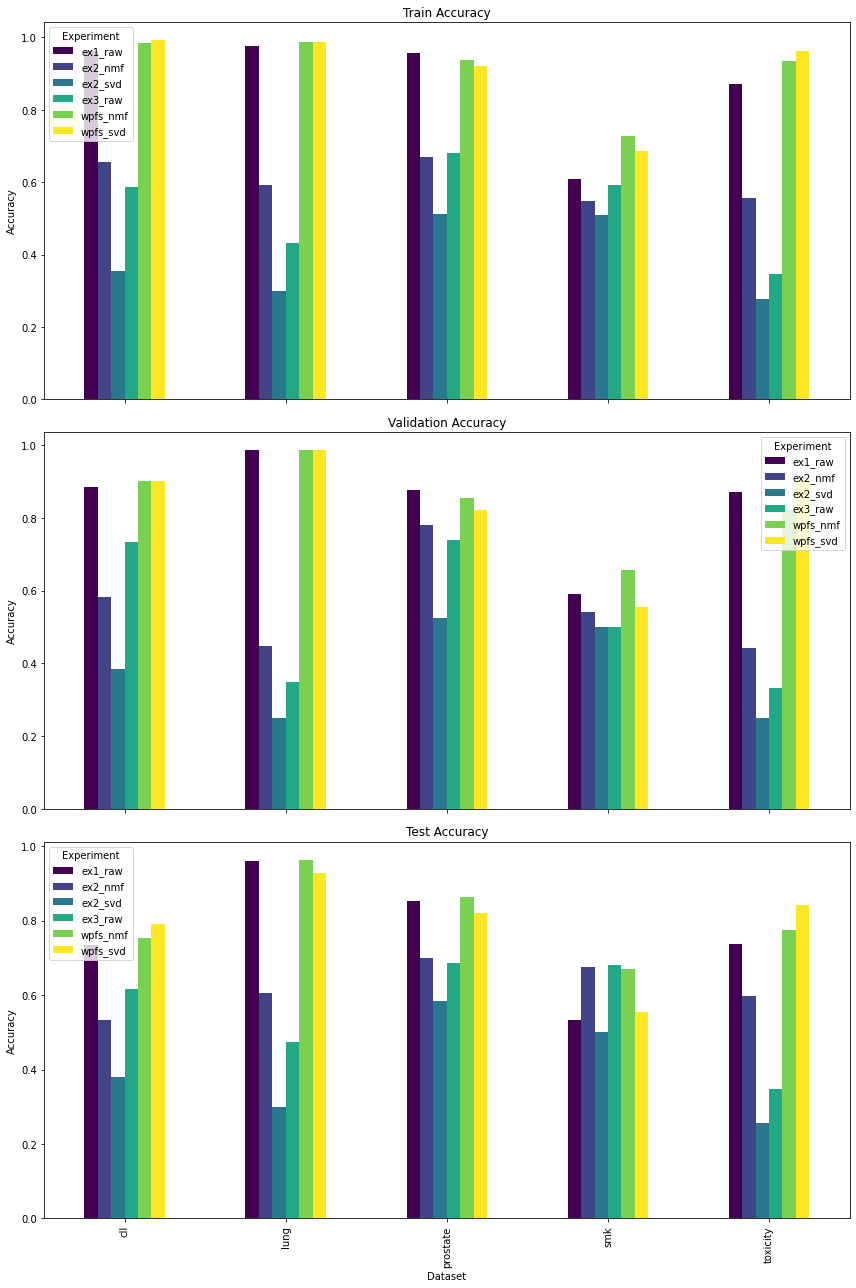

In [20]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define datasets and experiment types
datasets = ('lung', 'prostate', 'toxicity', 'cll', 'smk')
experiment_types = ('wpfs_svd', 'wpfs_nmf', 'ex1_raw', 'ex2_svd', 'ex2_nmf', 'ex3_raw')
experiment_results = []

# Iterate over each dataset and experiment type
for dataset in datasets:
    for experiment_type in experiment_types:
        experiment_name = f"{experiment_type}_{dataset}"
        folder_path = os.path.join('logs', experiment_name)
        
        # Check if folder_path exists to avoid errors
        if os.path.exists(folder_path):
            for folder in os.listdir(folder_path):
                metrics_path = os.path.join(folder_path, folder, 'metrics.csv')
                
                # Check if metrics.csv exists to avoid errors
                if os.path.exists(metrics_path):
                    metrics = pd.read_csv(metrics_path)
                    
                    train_balanced_acc = metrics['bestmodel_train/balanced_accuracy'].max()
                    valid_balanced_acc = metrics['bestmodel_valid/balanced_accuracy'].max()
                    test_balanced_acc = metrics['bestmodel_test/balanced_accuracy'].max()
                    
                    experiment_results.append({
                        'Dataset': dataset,
                        'Experiment': experiment_type,
                        'Train Accuracy': train_balanced_acc,
                        'Validation Accuracy': valid_balanced_acc,
                        'Test Accuracy': test_balanced_acc
                    })

# Create a DataFrame from the results
results_df = pd.DataFrame(experiment_results)

# Group results by Dataset and Experiment and calculate mean values
grouped_results = results_df.groupby(['Dataset', 'Experiment']).mean().reset_index()

# Style the DataFrame for better visualization
styled_results = grouped_results.style.background_gradient(cmap='viridis', subset=[])
styled_results = styled_results.set_caption('Experiment Results Summary')
styled_results = styled_results.set_table_styles([{
    'selector': 'caption',
    'props': [('text-align', 'center'),
              ('font-size', '16px'),
              ('font-weight', 'bold')]
}])
#styled_results = styled_results.highlight_max(subset=['Train Balanced Accuracy', 'Validation Balanced Accuracy', 'Test Balanced Accuracy'], color='lightgreen')

# Display the styled DataFrame
display(styled_results)

# Create bar charts for each metric
fig, axes = plt.subplots(3, 1, figsize=(12, 18), sharex=True)

# Plot Train Balanced Accuracy
grouped_results.pivot("Dataset", "Experiment", "Train Accuracy").plot(kind='bar', ax=axes[0], cmap='viridis')
axes[0].set_title('Train Accuracy')
axes[0].set_ylabel('Accuracy')

# Plot Validation Balanced Accuracy
grouped_results.pivot("Dataset", "Experiment", "Validation Accuracy").plot(kind='bar', ax=axes[1], cmap='viridis')
axes[1].set_title('Validation Accuracy')
axes[1].set_ylabel('Accuracy')

# Plot Test Balanced Accuracy
grouped_results.pivot("Dataset", "Experiment", "Test Accuracy").plot(kind='bar', ax=axes[2], cmap='viridis')
axes[2].set_title('Test Accuracy')
axes[2].set_ylabel('Accuracy')
axes[2].set_xlabel('Dataset')

plt.tight_layout()
plt.show()


In [ ]:
experiment_name = "test"

# itearte all folders in the experiment folder
train_balanced_accs, valid_balanced_acc, test_balanced_acc = [], [], []

for folder in os.listdir(os.path.join('logs', experiment_name)):
	metrics = pd.read_csv(os.path.join('logs', experiment_name, folder, 'metrics.csv'))

	# each column 'bestmodel_train/bestmodel_valid/bestmodel_test' contains only one non-zero entry
	# 	which is computed at the end of the experiment
	train_balanced_accs.append(metrics['bestmodel_train/balanced_accuracy'].max())
	valid_balanced_acc.append(metrics['bestmodel_valid/balanced_accuracy'].max())
	test_balanced_acc.append(metrics['bestmodel_test/balanced_accuracy'].max())

print(f"Average across all {len(train_balanced_accs)} experiments:")
print(f"train_balanced_accs mean: %.2f" % ((sum(train_balanced_accs)/len(train_balanced_accs))*100))
print(f"valid_balanced_acc mean: %.2f" % ((sum(valid_balanced_acc)/len(valid_balanced_acc))*100))
print(f"test_balanced_acc mean: %.2f" % ((sum(test_balanced_acc)/len(test_balanced_acc))*100))